|               |          |
|---------------|----------|
|**Programme Title:**| Higher Diploma in DA for Business|
|**Cohort:**| PT|
|**Module Title(s):**| Statistical Techniques for Data Analytics|
|**Assignment Type:**| Individual or Group of 2 people|
|**Assignment Title:**| CA2: Statistics Assessment|
|**Lecturer(s):**| Marina Iantorno|
|**Submission Deadline Date:**|07/01/2023 (23.55 pm)|

# Project Requirements  
  
- Clean and prepare the data to analyse it.
- Use 3 plots to identify valuable information from the data.
- Use descriptive Statistics to summarise your data.
- Choose two variables and perform Hypothesis Tests based on the data and interpret the results (you
can perform a hypothesis test to compare the variables, or an individual hypothesis test for each
variable). Interpretation is vital at the end of the analysis.
- Choose two variables and identify the real average range of them.
- Use one Binomial distribution to identify/explain something about a variable. Calculate two
probabilities using this distribution.  

Write a report that contains a maximum of 5 pages with writing in font size 11. Justify the use of the metrics
you calculated and the techniques you used.  

Your answers should be in form of a report. It must include an introduction to the selected topic, argument
and explanation of your calculations, conclusions. The calculations must be in an Appendix which will not be
included in the Word Count of the report. 

In [1]:
import seaborn as sns
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import pyforest

# Data Collection.  

Abstract. 

- This dataset includes 244 instances that regroup a data of 2 regions of Algeria,namely the Brjajia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.  

- 122 instances for each region .  

- The Period is from June 2012 to September 2012.The Dataset includes 11 attributes and 1 output attribute i.e. Temperature.  

- The data consists of 14 column and 246 rows.

I will be using the Algerian Forest Fires Dataset.

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'

In [3]:
df = pd.read_csv(url,header=1)

<IPython.core.display.Javascript object>

# EDA: Exploratory Data Analysis  


## Data Understanding

Attribute Information :-

<u>Period Covered</u>

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)  

<u>Weather data observations</u>

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42  
RH : Relative Humidity in %: 21 to 90  
Ws :Wind speed in km/h: 6 to 29  
Rain: total day in mm: 0 to 16.8  
 
<u>FWI Components</u>

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5  
Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9  
Drought Code (DC) index from the FWI system: 7 to 220.4  
Initial Spread Index (ISI) index from the FWI system: 0 to 18.5  
Buildup Index (BUI) index from the FWI system: 1.1 to 68  
Fire Weather Index (FWI) Index: 0 to 31.1  
Classes: two classes, namely Fire and not Fire  

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [6]:
df.shape

(246, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


The dataframe doesnt comply with the data dictionary and will need to be cleaned to align.

In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

I can see that the columns do not have consistant string values, some have spaces, this will need to be cleaned in the next section.

In [9]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


As per the Abstract we are only expecting to see 244 instances.When we describe the dataframe we see 246 and 245 in various columns, this means we will need to remove some values in the next phase.

In [10]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [11]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [12]:
missing_values_table(df)

<IPython.core.display.Javascript object>

Your selected dataframe has 14 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values
Classes,2,0.8
month,1,0.4
year,1,0.4
Temperature,1,0.4
RH,1,0.4
Ws,1,0.4
Rain,1,0.4
FFMC,1,0.4
DMC,1,0.4
DC,1,0.4


In [13]:
df[df.isnull().any(axis=1)] # inorder to check the row which is having the missing values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


Here the Missing values at 122th index seprate the data set in two regions.

1 : Bejaia Region Dataset

2 : Sidi-Bel Abbes Region Dataset

Therefore, we can make a new column based on the Region

In [14]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


No duplicates data is there in the dataset

## Data Preperation & Cleaning



In [15]:
df.loc[:122,'Region']='Bejaia'
df.loc[122:,'Region']='Sidi-Bel Abbes'
df[['Region']] = df[['Region']].astype(str)

In [16]:
df.shape

(246, 15)

A new column now exists for 'Region'

In [17]:
# Remove null or na values rows
df =df.dropna().reset_index(drop=True) 
df.shape

(244, 15)

In [18]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Sidi-Bel Abbes


In [19]:
#remove 122th column
df = df.drop(122).reset_index(drop=True)
pd.set_option('display.max_rows', None)
df

<IPython.core.display.Javascript object>

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,Bejaia
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,Bejaia
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,Bejaia
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,Bejaia
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,Bejaia


In [20]:
unique_classes = df['Classes'].unique()
print(unique_classes)

KeyError: 'Classes'

When calling column headers to look at unique values I get an error. I will clean the headers and see if that works.

In [21]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [22]:
unique_classes = df['Classes'].unique()
print(unique_classes)

['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


In [23]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [24]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Converting attributes from Object to Integer

In [25]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [26]:
df.dtypes

day             int64
month           int64
year            int64
Temperature     int64
RH              int64
Ws              int64
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region         object
dtype: object

Converting the Necessary Column Datatype to Float

In [27]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [28]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

<IPython.core.display.Javascript object>

/Users/brain/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


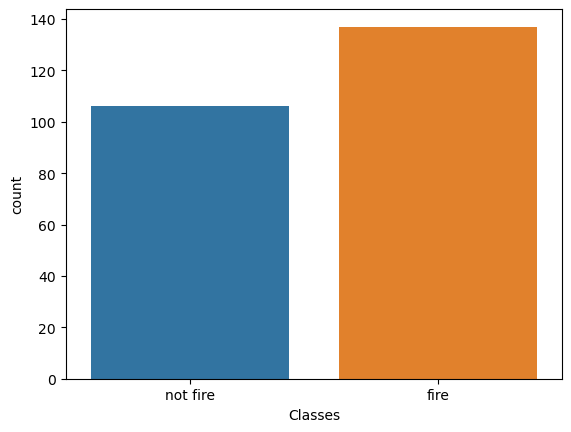

None
fire        137
not fire    106
Name: Classes, dtype: int64


In [29]:
sns.countplot(df['Classes'])
print(plt.show())
print(df.Classes.value_counts())

In [30]:
# Calculate the frequency of each class as a percentage of the total
class_freqs = df["Classes"].value_counts(normalize=True)

# Print the frequency of each class
print(class_freqs)

fire        0.563786
not fire    0.436214
Name: Classes, dtype: float64


<IPython.core.display.Javascript object>

/Users/brain/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


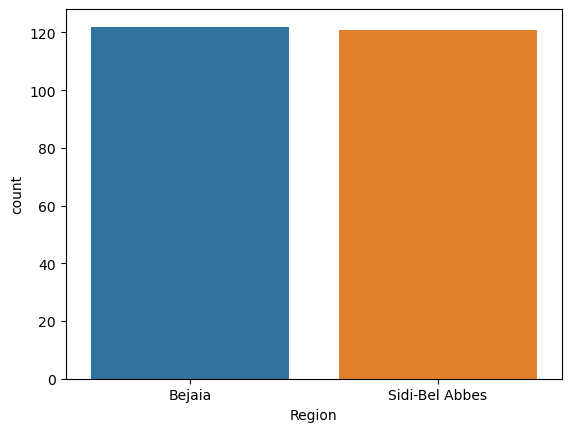

None
Bejaia            122
Sidi-Bel Abbes    121
Name: Region, dtype: int64


In [31]:
sns.countplot(df['Region'])
print(plt.show())
print(df.Region.value_counts())

In [32]:
# Calculate the frequency of each region as a percentage of the total
region_freqs = df["Region"].value_counts(normalize=True)

# Print the frequency of each region
print(region_freqs)

Bejaia            0.502058
Sidi-Bel Abbes    0.497942
Name: Region, dtype: float64


In [33]:
df.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [34]:
df.month.unique()

array([6, 7, 8, 9])

As we know from the data that it is all from the 'year' 2012 we can remove it.

In [35]:
df=df.drop(['year'],axis=1)

In [36]:
df.shape

(243, 14)

Text(0, 0.5, 'Temperature')

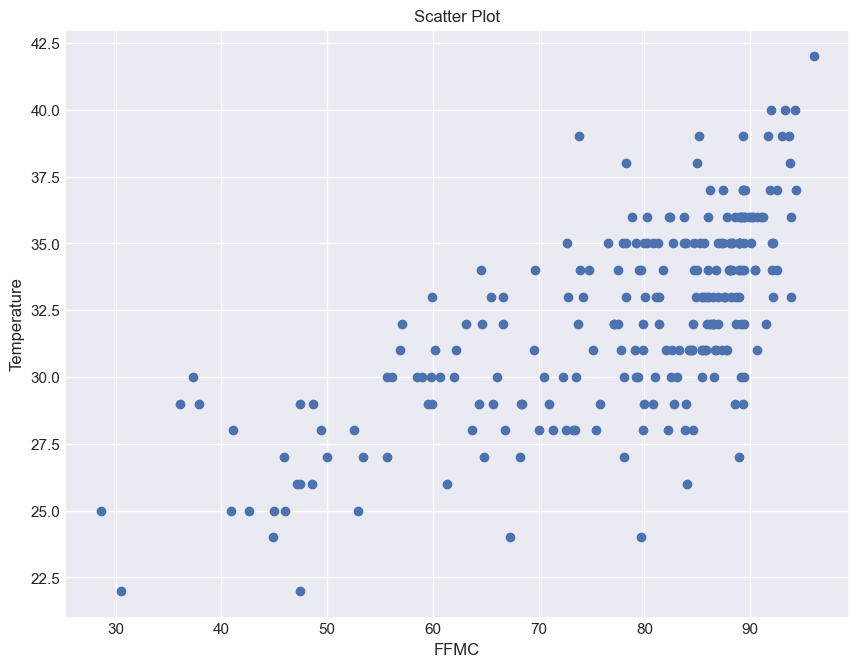

In [143]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Add a title to the plot
plt.title('Scatter Plot',y=1)
plt.scatter(df['FFMC'],df['Temperature'])
plt.xlabel("FFMC")
plt.ylabel("Temperature")

This graph displays the relationship between the Fine Fuel Moisture Code (FFMC) and temperature for different levels of fire risk. The FFMC is a measure of the moisture content in leaves and other fine fuels, with lower values indicating dry conditions that are more conducive to wildfires. The temperature is also an important factor in fire risk, with higher temperatures often leading to increased fire activity. Overall, this graph shows that as FFMC and temperature increase, the risk of wildfire also increases.

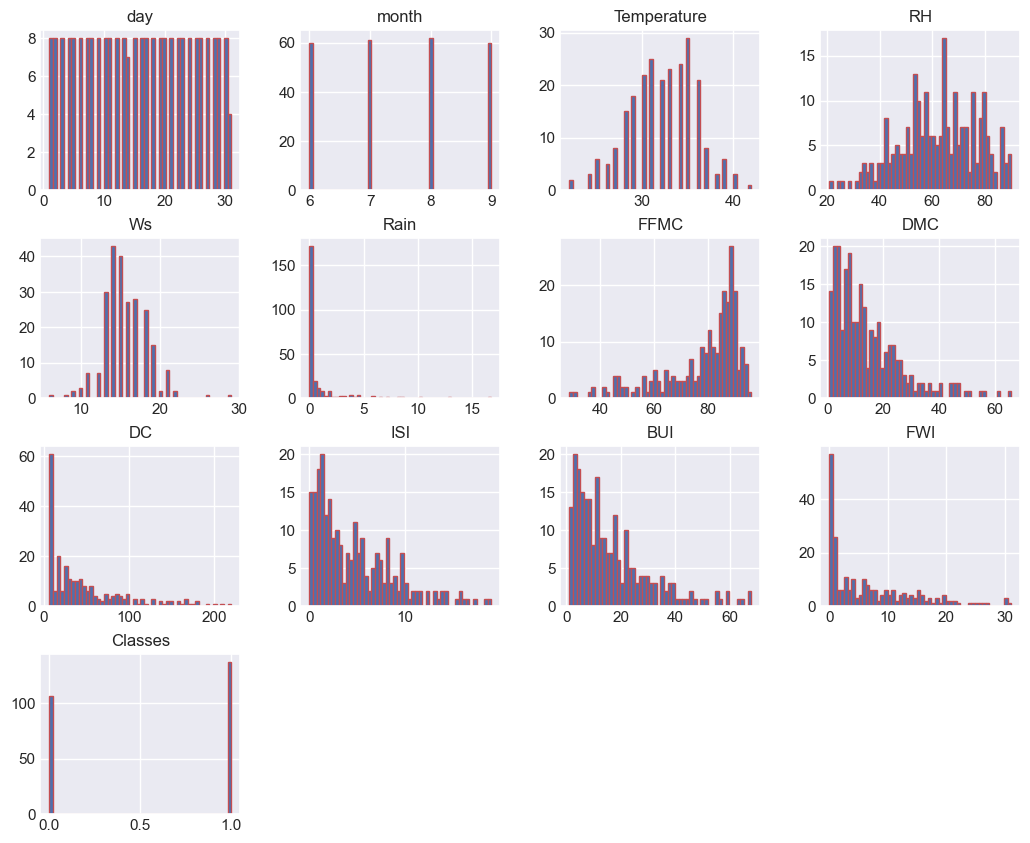

In [145]:
# Plot density plot for all features
#plt.style.use('seaborn')
df.hist(bins=50, figsize=(10,8), ec = 'r')
plt.show()

The histogram shows me that the classes,day and month variables are populated as expected.  
FFMC and DMC are highly skewed but in opposite directions.  
Temperature is evenly distributed, this makes sense based on the range of months being analysed.

In [38]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

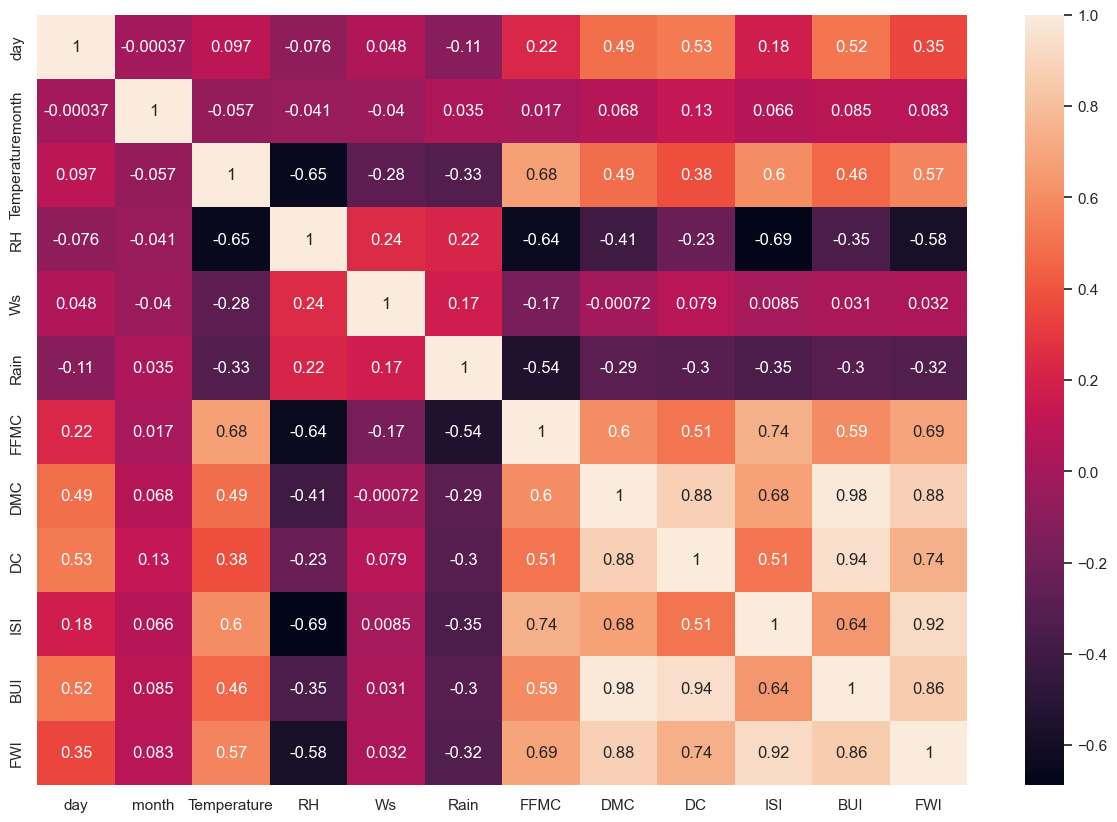

In [39]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

I have high correlation between BUI & DMC, BUI & DC, FWI & ISI

# Descriptive Statistics


## Measures of Central Tendency

A measure of central tendency describes the center of the data,  often represented by the mean,  median, and  mode.

### Mean  
  
Mean represents the arithmetic average of the data.

In [40]:
mean = df.mean()
print(mean)

day            15.761317
month           7.502058
Temperature    32.152263
RH             62.041152
Ws             15.493827
Rain            0.762963
FFMC           77.842387
DMC            14.680658
DC             49.430864
ISI             4.742387
BUI            16.690535
FWI             7.035391
dtype: float64


/var/folders/z3/l1l__mdd63g243d7sx73hqj40000gn/T/ipykernel_42729/1201150306.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()


From the output, I can infer that the average **day** and **month** is 15/07/2012,and the average **FWI** in that period is 7.

### Median. 
  
Simply put, the median represents the 50th percentile or mean of the data that divides the distribution in half.

In [41]:
median= df.median()
print(median)

day            16.0
month           8.0
Temperature    32.0
RH             63.0
Ws             15.0
Rain            0.0
FFMC           83.3
DMC            11.3
DC             33.1
ISI             3.5
BUI            12.4
FWI             4.2
dtype: float64


/var/folders/z3/l1l__mdd63g243d7sx73hqj40000gn/T/ipykernel_42729/375931713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median= df.median()


### Mode. 
  
Modes represent the most common values of variables in the data. This is the only measure of central tendency available for categorical variables, unlike  mean and median, which are available only for quantitative data.

In [42]:
mode= df.mode()
print(mode)

    day  month  Temperature    RH    Ws  Rain  FFMC  DMC   DC  ISI  BUI  FWI  \
0     1    8.0         35.0  55.0  14.0   0.0  88.9  7.9  8.0  1.1  3.0  0.4   
1     2    NaN          NaN  64.0   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
2     3    NaN          NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
3     4    NaN          NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
4     5    NaN          NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
5     6    NaN          NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
6     7    NaN          NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
7     8    NaN          NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
8     9    NaN          NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
9    10    NaN          NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
10   11    NaN          NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
11   12    NaN          NaN   NaN   NaN 

In [ ]:
# Create a histplot
df.hist()

# Display the plot
plt.show()

## Measures of Dispersion. 
  
In the previous section, I showed different measures of central tendency. However, as we saw in our data,  these measures differ in many variables. This is due to the extent to which the distribution is expanded or compressed. In statistics, this is measured by spread, also known as volatility, spread, or spread. The most common measures of variance are standard deviation, variance, and  interquartile range.

### Standard Deviation  
  
Standard deviation is a measure  used to quantify how much a set of data values deviates from its mean. A low standard deviation for a variable indicates that the data points tend to be closer to the mean and vice versa.

In [43]:
df.std()

/var/folders/z3/l1l__mdd63g243d7sx73hqj40000gn/T/ipykernel_42729/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


day             8.842552
month           1.114793
Temperature     3.628039
RH             14.828160
Ws              2.811385
Rain            2.003207
FFMC           14.349641
DMC            12.393040
DC             47.665606
ISI             4.154234
BUI            14.228421
FWI             7.440568
dtype: float64

/var/folders/z3/l1l__mdd63g243d7sx73hqj40000gn/T/ipykernel_42729/2500482907.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = df.std()


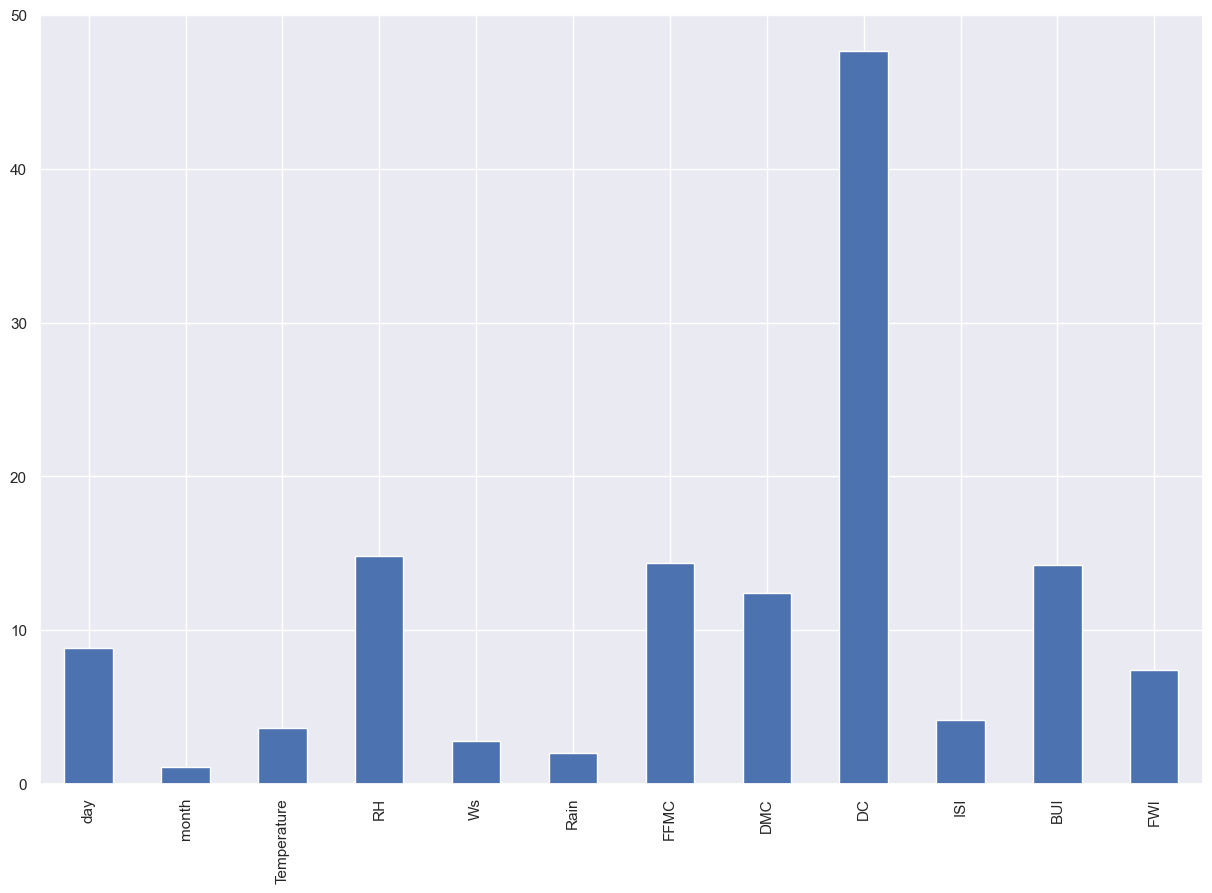

In [44]:
# Compute the standard deviation of the data for each column
std = df.std()

# Plot the standard deviation
std.plot(kind='bar')

# Display the plot
plt.show()

### Variance. 
  
Variance is another measure of dispersion. It is the standard deviation squared, the covariance between the random variable and itself.

In [45]:
df.var()

/var/folders/z3/l1l__mdd63g243d7sx73hqj40000gn/T/ipykernel_42729/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


day              78.190729
month             1.242764
Temperature      13.162670
RH              219.874333
Ws                7.903887
Rain              4.012837
FFMC            205.912204
DMC             153.587434
DC             2272.009994
ISI              17.257659
BUI             202.447968
FWI              55.362048
dtype: float64

/var/folders/z3/l1l__mdd63g243d7sx73hqj40000gn/T/ipykernel_42729/4016914398.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = df.var()


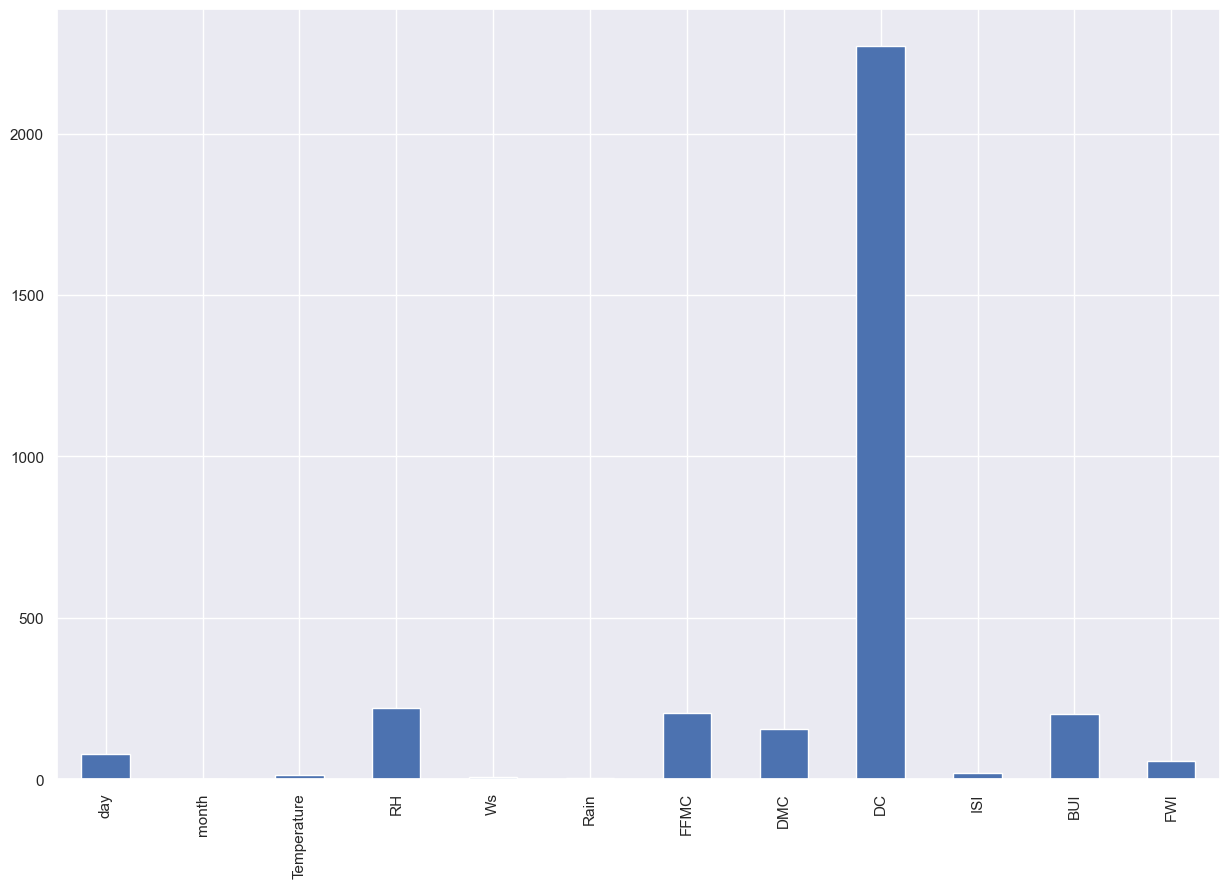

In [46]:
# Compute the variance of the data for each column
variance = df.var()

# Plot the variance
variance.plot(kind='bar')

# Display the plot
plt.show()

### Interquartile Range (IQR)  
  
Interquartile range (IQR) is a measure of statistical variation, calculated as the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile).  IQR is also a very important measure for identifying outliers and can be visualized using boxplots.

In [47]:
# Remove any columns that have object data type
df_1 = df.select_dtypes(exclude='object')

In [48]:
#define function to calculate interquartile range
def find_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))

In [49]:
#calculate IQR for all columns
df_1.apply(find_iqr)

day            15.00
month           1.00
Temperature     5.00
RH             21.00
Ws              3.00
Rain            0.50
FFMC           16.45
DMC            15.00
DC             56.75
ISI             5.85
BUI            16.65
FWI            10.75
dtype: float64

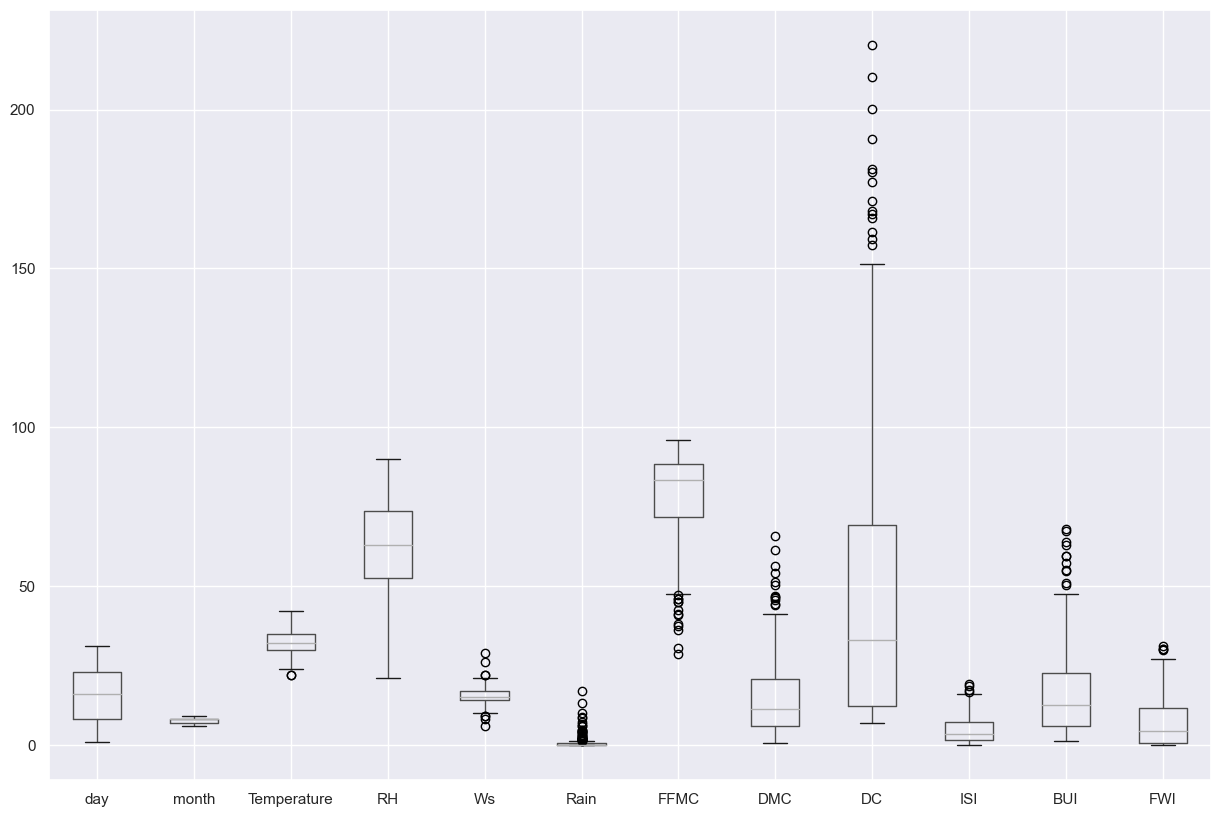

In [50]:
# Create a boxplot
df.boxplot()

# Display the plot
plt.show()

### Skewness. 
  
This is a measure of the symmetry or lack of symmetry of a real-valued random variable about its mean. Skew values are either positive, negative, or undefined. A perfectly symmetric distribution has the same mean,  median, and mode. However, the variables in the data are not symmetrical, so they have different  central tendency values.

In [148]:
df.skew()

/var/folders/z3/l1l__mdd63g243d7sx73hqj40000gn/T/ipykernel_42729/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


day            0.000365
month         -0.005207
Temperature   -0.191327
RH            -0.242790
Ws             0.555586
Rain           4.568630
FFMC          -1.320130
DMC            1.522983
DC             1.473460
ISI            1.140243
BUI            1.452745
FWI            1.147593
Classes       -0.258846
dtype: float64

The skewness values can be interpreted in the following manner:

**Highly skewed distribution:** If the skewness value is less than −1 or greater than +1.

**Moderately skewed distribution:** If the skewness value is between −1 and −½ or between +½ and +1.

**Approximately symmetric distribution:** If the skewness value is between −½ and +½.

/var/folders/z3/l1l__mdd63g243d7sx73hqj40000gn/T/ipykernel_42729/1822832480.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = df.skew()


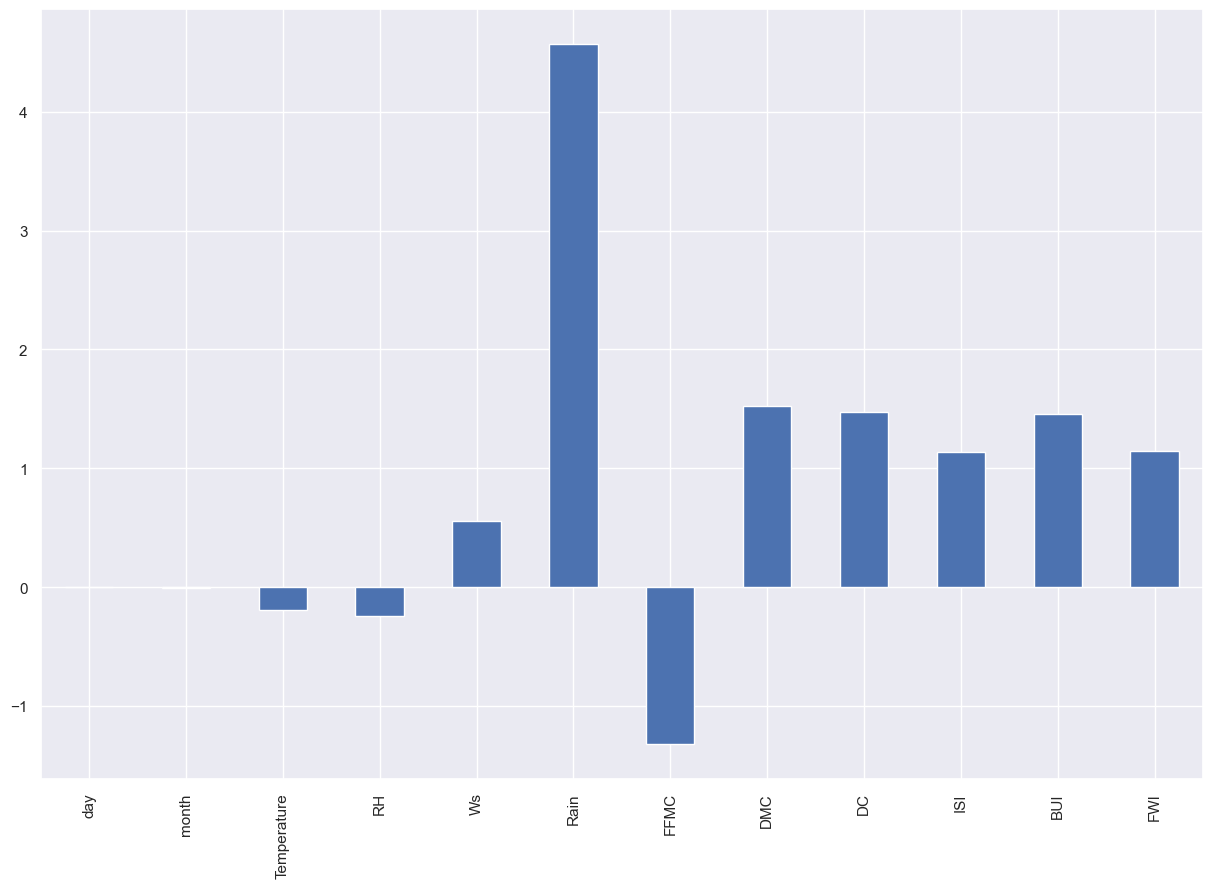

In [51]:
# Compute the skewness of the data for each column
skewness = df.skew()

# Plot the skewness
skewness.plot(kind='bar')

# Display the plot
plt.show()

## Probability (distributions)  
  
Probability distributions are used to describe the probability of a certain event or outcome occurring. They provide a way to calculate the likelihood of different outcomes in a statistical experiment. Some common examples of probability distributions include the binomial distribution and normal distribution. 

In [52]:
# Encoding not fire as 0 and Fire as 1
df['Classes']=np.where(df['Classes']=='not fire',0,1)

In [53]:
# Print the integer columns
df_int = df.select_dtypes(include=['int'])
df_int

,day,month,Temperature,RH,Ws,Classes
0,1,6,29,57,18,0
1,2,6,29,61,13,0
2,3,6,26,82,22,0
3,4,6,25,89,13,0
4,5,6,27,77,16,0
5,6,6,31,67,14,1
6,7,6,33,54,13,1
7,8,6,30,73,15,1
8,9,6,25,88,13,0
9,10,6,28,79,12,0


In [54]:
# this a view of the discrete variables within the data.
df_int.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Classes'], dtype='object')

In [55]:
# Print the float columns
df_flo = df.select_dtypes(include=['float'])
df_flo

,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [56]:
# this a view of the continuous variables within the data.
df_flo.columns

Index(['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'], dtype='object')

### Discrete probability distributions 
  
A discrete probability distribution is a distribution that represents the probabilities of different outcomes for a discrete random variable. A discrete random variable is a random variable that can only take on a certain number of discrete values, rather than any value in a continuous range.

For example, consider a random variable X that represents the number of heads that appear when a coin is flipped three times. The possible values for X are 0, 1, 2, or 3, and the probability of each of these values occurring is given by a discrete probability distribution.

There are several different types of discrete probability distributions, including the Bernoulli distribution, the binomial distribution, the geometric distribution, and the Poisson distribution. Each of these distributions is used to model different types of discrete random variables and the probability of different outcomes occurring.

#### Probability tables

In [57]:
# Create the frequency table
dist_prob_table = df["Classes"].value_counts(normalize=True)

# Print the frequency table
print(dist_prob_table)

1    0.563786
0    0.436214
Name: Classes, dtype: float64


#### Binomial Distribution  
  
The binomial distribution is one of the most commonly used distributions in statistics after the normal distribution. The binomial distribution is a discrete probability distribution for a set of successes (𝑋) in a set of independent experiments (𝑛). Every experiment has two possible outcomes: success and failure. A successful outcome has probability 𝑝 and a  failure has probability (1−𝑝). 

It is known from the data wrangling that over a 243 day period, 137 of those days (60%)there is a forest fire. 

##### What is the probability of having 60 fires in 100 days?

In [58]:
# from scipy.stats import binom
from scipy.stats import binom

# setting the parameter values
# Assume p is the probability of a fire occurring on a given day
p = 0.6
# The number of days is 100
n = 100
# The number of successes is also 60 (since we want the probability of having 60 fires)
k = 60

# Compute the probability using the binomial distribution
probability = binom.pmf(k=k, n=n, p=p)
probability

0.08121914499610607

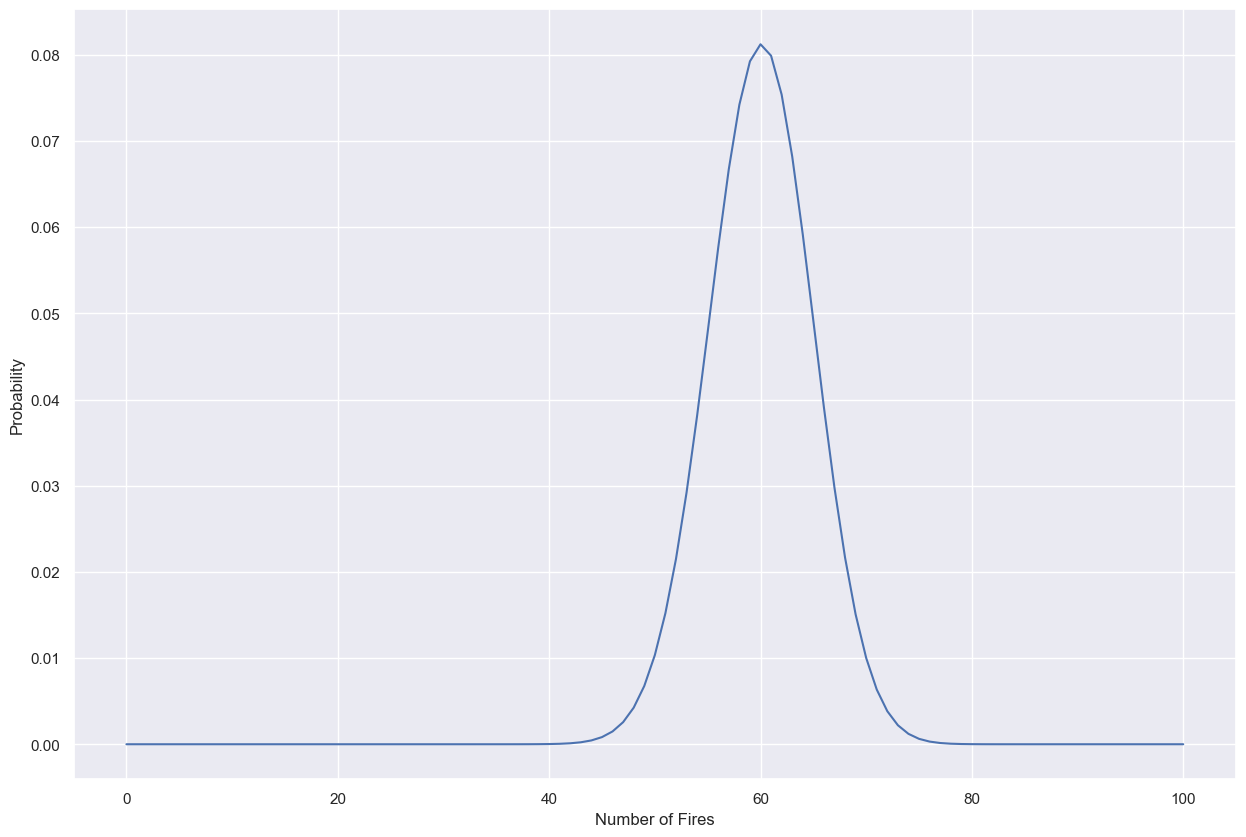

In [59]:
# Assume p is the probability of a fire occurring on a given day
p = 0.6

# The number of days is 100
n = 100

# Create a range of possible number of successes
k = range(n+1)

# Compute the probability of each number of successes using the binomial distribution
probabilities = [binom.pmf(k=i, n=n, p=p) for i in k]

# Plot the probabilities
plt.plot(k, probabilities)
plt.xlabel('Number of Fires')
plt.ylabel('Probability')
plt.show()


##### What is the probability of having more than 60 fires in 100 days?

In [60]:
#We want the probability that greater than 60 fires

binom.sf(k = 60, n = 100, p= 0.6)

0.46207534088596464

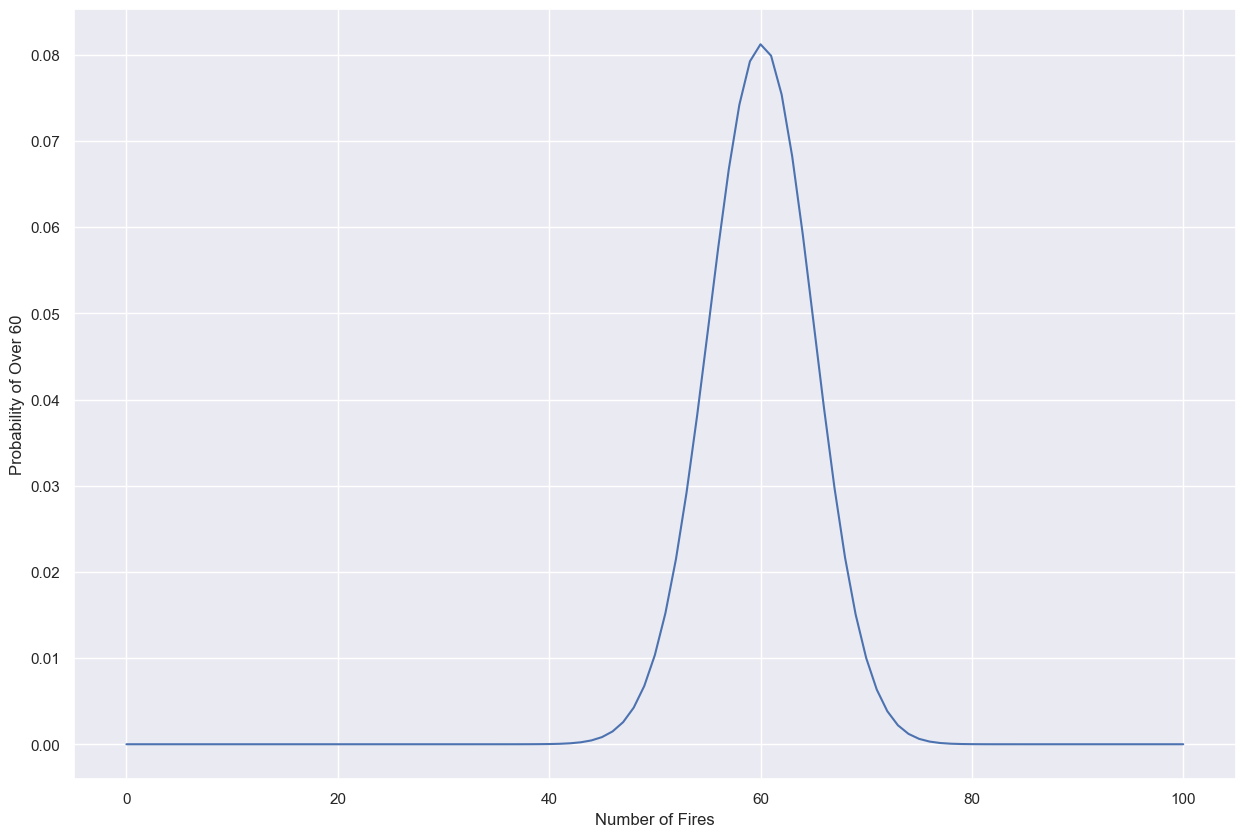

In [61]:
# Assume p is the probability of a fire occurring on a given day
p = 0.6

# The number of days is 100
n = 100

# Create a range of possible number of successes
k = range(n+1)

# Compute the probability of each number of successes using the binomial distribution
probabilities = [binom.pmf(k=i, n=n, p=p) for i in k]

# Plot the probabilities
plt.plot(k, probabilities)
plt.xlabel('Number of Fires')
plt.ylabel('Probability of Over 60')
plt.show()

## Real Average Range 
  
To identify the real average range of two variables in my dataset, I can calculate the range of each variable and then take the average of the two ranges. The range of a variable is simply the difference between the maximum and minimum values of that variable.  

The two variables I have chosen are:

1. Temperature
2. FWI

In [62]:
# Select the two variables
var1 = df['Temperature']
var2 = df['FWI']

# Calculate the range of each variable
range1 = var1.max() - var1.min()
range2 = var2.max() - var2.min()

# Calculate the average range
average_range = (range1 + range2) / 2

print(average_range)

25.55


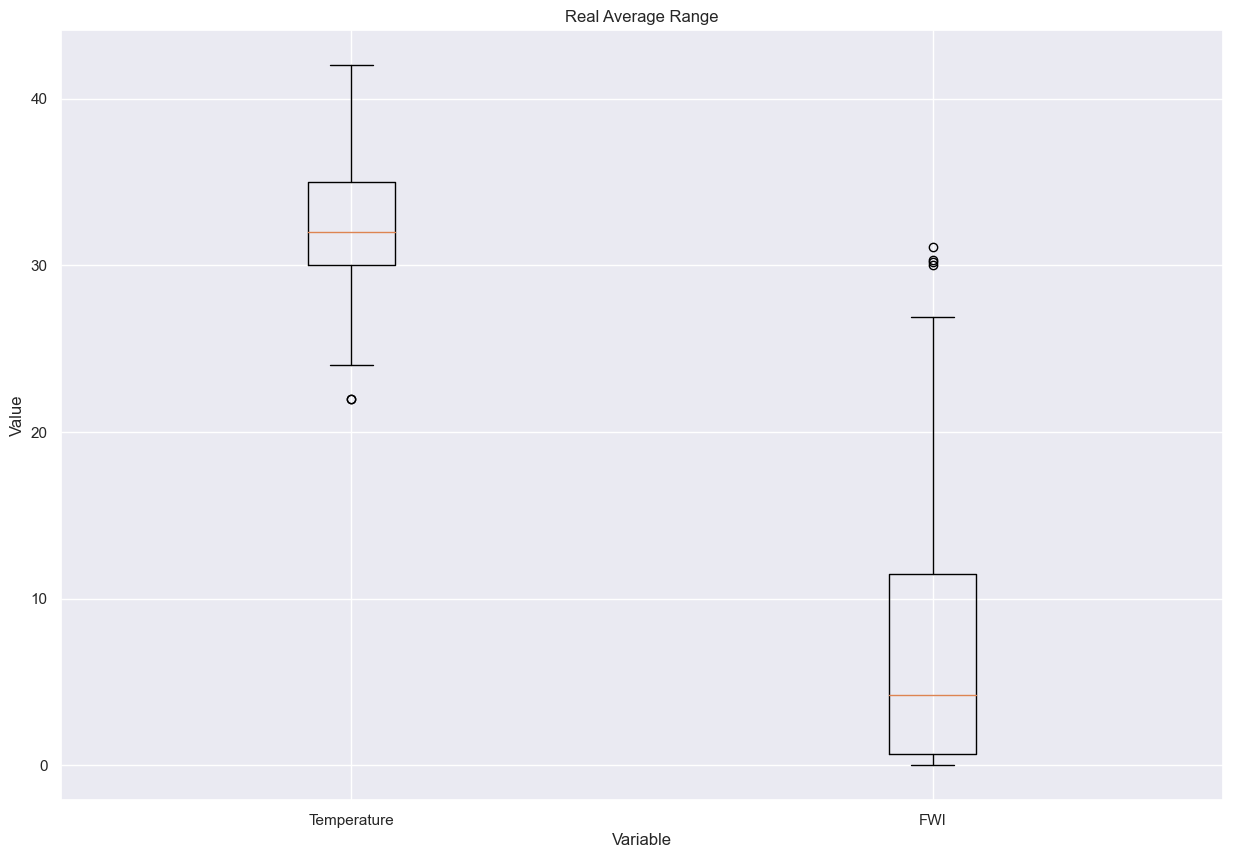

In [63]:
# Create a box plot
plt.boxplot([var1, var2], labels=['Temperature', 'FWI'])

# Add a title and labels
plt.title('Real Average Range')
plt.xlabel('Variable')
plt.ylabel('Value')

# Show the plot
plt.show()

## Hypothesis Testing

A hypothesis test is a statistical procedure that is used to evaluate the validity of a hypothesis about a population parameter. When you use a hypothesis test, you start with a null hypothesis and an alternative hypothesis. The null hypothesis is a statement that suggests that there is no relationship between the variables in your study, while the alternative hypothesis is a statement that suggests that there is a relationship between the variables.  

**My Hypothesis**  
  
The average FWI of forest fires is greater than the average FWI of no forest fires.  

Ho: Fires FWI, on average, not greater than No Fires FWI.  
Ha: Fires FWI, on average, greater than No Fires FWI.  

### Performing Statistical Tests. 
  
Based on the type of data I collected, I will perform a one-tailed t-test to test whether the average FWI of forest fires is greater than the average FWI of no forest fires.This test gives you:  

- an estimate of the difference in average FWI between the two groups.  

- a p-value showing how likely you are to see this difference if the null hypothesis of no difference is true.

In [72]:
from scipy.stats import ttest_ind
# Select the FWI values for each class
fwis_class_1 = df[df['Classes'] == 1]['FWI']
fwis_class_2 = df[df['Classes'] == 0]['FWI']

# Perform the t-test
t_statistic, p_value = ttest_ind(fwis_class_1, fwis_class_2, equal_var=False, nan_policy='omit')

# Determine the significance level
alpha = 0.05  # Set the significance level to 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The difference in means is statistically significant (p = {})".format(p_value))
else:
    print("The difference in means is not statistically significant (p = {})".format(p_value))

The difference in means is statistically significant (p = 3.260736957110706e-39)


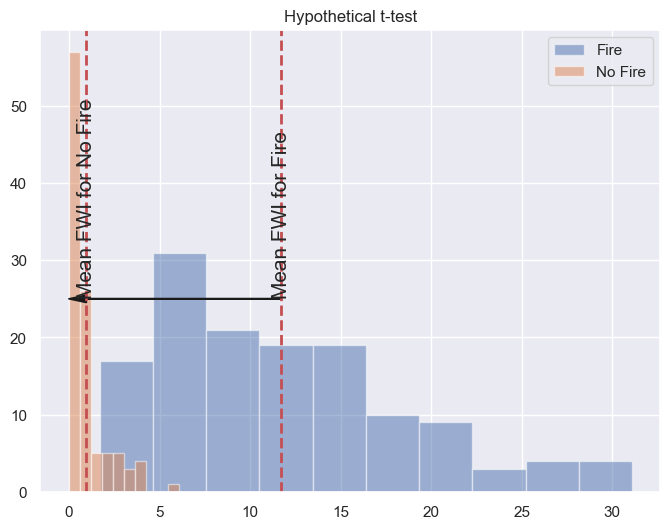

In [99]:

# Set the figure size
plt.figure(figsize=(8, 6))

# Add a title to the plot
plt.title('Hypothetical t-test',y=1)

# Select the FWI values for each class
fwis_class_1 = df[df['Classes'] == 1]['FWI']
fwis_class_2 = df[df['Classes'] == 0]['FWI']

# Calculate the mean FWI values for each class
mean_fwi_class_1 = fwis_class_1.mean()
mean_fwi_class_2 = fwis_class_2.mean()

# Create a histogram of the FWI values for each class
plt.hist(fwis_class_1, alpha=0.5, label='Fire')
plt.hist(fwis_class_2, alpha=0.5, label='No Fire')

# Add vertical lines to the plot indicating the mean FWI values for each class
plt.axvline(mean_fwi_class_1, color='r', linestyle='dashed', linewidth=2)
plt.axvline(mean_fwi_class_2, color='r', linestyle='dashed', linewidth=2)

# Add a legend to the plot
plt.legend()

# Add text labels to the plot
plt.text(mean_fwi_class_1, 25, 'Mean FWI for Fire', ha='center', va='bottom', rotation=90,fontsize=15)
plt.text(mean_fwi_class_2, 25, 'Mean FWI for No Fire', ha='center', va='bottom', rotation=90,fontsize=15)

# Add an arrow to the plot
plt.arrow(mean_fwi_class_1, 25, mean_fwi_class_2 - mean_fwi_class_1, 0, width=0.1, head_width=1, head_length=1, fc='k', ec='k')


# Show the plot
plt.show()